In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils.utils as utils

In [5]:
def isdescend(seq):
    "Judge if a list is descending"
    for j in range(len(seq)-1):
        if seq[j] < seq[j+1]:
            return False
        
    return True

def sep_seq(seq, step_forward):
    "Separate length sequence to several CB periods"
    
    # Normalize data
#     minval = min(seq)
#     maxval = max(seq)
#     seq = normalize(seq)
    
    # Extract initiation points
    inits = []
    
    walker = 0
    
    while walker < len(seq) - 10:
        
        if isdescend(seq[walker:walker+10]):
            inits.append(walker)
            walker += step_forward
        else:
            walker += 1
            
    # Extract separated pieces
    pieces = []
    
    for j, init in enumerate(inits[:-1]):
        pieces.append(seq[inits[j]:inits[j+1]])
        
    return pieces, inits

def load_length(filename, start, end):
    "Load length data"
    lengths = pd.read_csv("./data/length/" + filename + ".csv").values[start:end]
#     minval = min(lengths)
#     maxval = max(lengths)
#     lengths = [(x - minval) / (maxval - minval) for x in lengths]
    return lengths

def add_length_plot(ax, lengths, color, fps, scale, step_forward=300):
    "Add length curves to ax"
    pieces, inits = sep_seq(lengths, step_forward)
    for piece in pieces:
        timeaxis = np.linspace(0, len(piece)/fps, len(piece))
        piece = recalibrate(piece, scale)
        ax.plot(timeaxis, piece, color=color, alpha=0.4)
    return inits

def recalibrate(seq, scale):
    "Recalibrate sequence with scale"
    minval = min(seq)
    seq = [scale*(x-seq[0]) for x in seq]
#     seq = [scale*(x-minval) for x in seq]
#     seq = [(x-minval) / (seq[0]-minval) for x in seq]
    return seq

def normalize(seq):
    minval = min(seq)
    maxval = max(seq)
    return [(x - minval) / (maxval - minval) for x in seq]

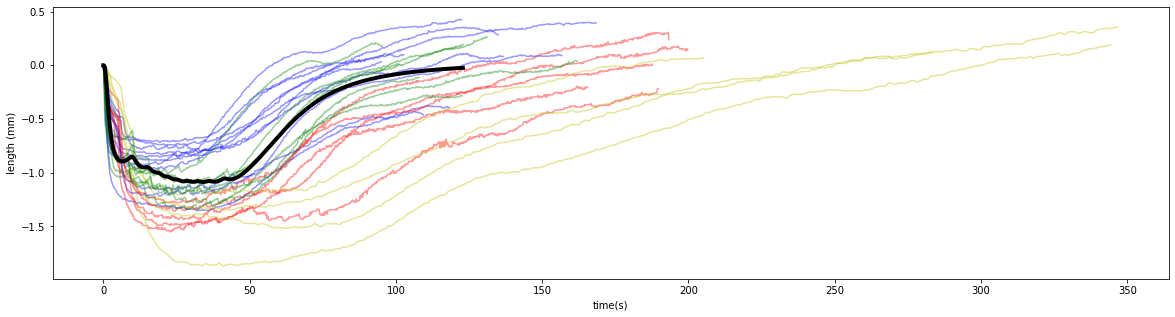

In [6]:
# Load model length
model_lengths = utils.length_of_model("./data/model_length/coords_658838_k7c03n001_rlx80.txt", 
                                      totaltime=250, display=False)
model_lengths = model_lengths[:1230]
model_lengths = recalibrate(model_lengths, 1)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# Data 1
lengths = load_length("lengths_Pre_Bisect_40x_4fps_ex4_ROIs", 950, 7000)
inits1 = add_length_plot(ax, lengths, 'b', 4, 0.227/40)
# Data 2
lengths = load_length("lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins", 9000, -1)
inits2 = add_length_plot(ax, lengths, 'r', 10, 0.227/25)
# # Data3
# lengths = pd.read_csv("./data/length/lengths_Control-EGCaMP_exp1_a1_30x10fps_5%.csv").values
# lengths = recalibrate(lengths, 0.227/30)
# lengths = lengths[2250:3800]
# timeaxis = np.linspace(0, 750/10, 750)
# ax.plot(timeaxis, lengths[:750], 'g', alpha=0.4)
# timeaxis = np.linspace(0, 630/10, 630)
# ax.plot(timeaxis, lengths[920:], 'g', alpha=0.4)
# Data4
lengths = load_length("lengths_DynWat_16X_Animal16_30mins", 500, -1)
inits4 = add_length_plot(ax, lengths, 'y', 1/1.2, 0.0085, step_forward=100)
# Data5
lengths = load_length("lengths_filtered_Pre_Bisect_40x_4fps_ex3", 300, 4300)
inits5 = add_length_plot(ax, lengths, 'g', 4, 0.227/40)

# Model
ax.plot(np.arange(0, 123, 0.1), model_lengths, linewidth=4, color='k')
ax.set_xlabel('time(s)')
ax.set_ylabel('length (mm)')
plt.show()